# Part A - Classification - Bank Marketing Campaign

## Source

## Link - https://www.kaggle.com/janiobachmann/bank-marketing-dataset

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## AIM: To predict if the client subscribed to a term deposit or not

## Dataset Information:

The dataset has 11,162 rows and 17 columns

### Data description:

Attribute information:

Input variables:

Bank client data:

1 - age : age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') 

3 - marital : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'primary','secondary','tertiary','unknown')

5 - default: has credit in default? (categorical: 'no','yes')

6 - balance: Account balance (numeric)

7 - housing: has housing loan? (categorical: 'no','yes')

8 - loan: has personal loan? (categorical: 'no','yes')

Related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - day: last contact day of the week (numeric: 1, 2, 3, ...., 29, 30, 31)

11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - duration: last contact duration, in seconds (numeric).

Other attributes:

13 - campaign: number of contacts performed during this campaign and for this client 

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown','success')

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset 

In [2]:
#Reading the dataet and checking the head of the dataset
df1 = pd.read_csv("Bank.csv", na_values = ['unknown'])
df = df1.sample(1000,random_state = 1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8422,31,admin.,single,secondary,no,554,yes,no,cellular,5,feb,94,1,-1,0,NaN,no
9226,43,blue-collar,married,secondary,no,514,yes,yes,cellular,20,apr,34,2,-1,0,NaN,no
8162,26,blue-collar,single,secondary,no,277,no,no,NaN,14,may,514,2,-1,0,NaN,no
4337,39,services,single,secondary,no,91,no,no,cellular,3,sep,213,1,185,1,success,yes
2438,40,management,married,tertiary,no,0,no,no,cellular,6,aug,131,2,98,6,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5891,31,admin.,single,secondary,no,626,yes,no,NaN,21,may,211,1,-1,0,NaN,no
1288,25,admin.,single,tertiary,no,3730,yes,no,cellular,27,feb,353,1,-1,0,NaN,yes
3500,77,NaN,married,NaN,no,397,no,no,telephone,7,may,300,3,-1,0,NaN,yes
5139,32,technician,married,secondary,no,348,yes,no,cellular,17,jul,926,1,-1,0,NaN,yes


In [3]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,NaN,yes
1,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes
2,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,yes
3,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,NaN,yes
4,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,NaN,no
11158,39,services,married,secondary,no,733,no,no,NaN,16,jun,83,4,-1,0,NaN,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,NaN,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 8422 to 3858
Data columns (total 17 columns):
age          1000 non-null int64
job          995 non-null object
marital      1000 non-null object
education    935 non-null object
default      1000 non-null object
balance      1000 non-null int64
housing      1000 non-null object
loan         1000 non-null object
contact      782 non-null object
day          1000 non-null int64
month        1000 non-null object
duration     1000 non-null int64
campaign     1000 non-null int64
pdays        1000 non-null int64
previous     1000 non-null int64
poutcome     268 non-null object
deposit      1000 non-null object
dtypes: int64(7), object(10)
memory usage: 140.6+ KB


In [5]:
#checking the mean and quartiles using the describe function
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,41.85200,1714.682000,15.824000,390.403000,2.489000,52.07300,0.841000
std,12.16125,4095.809682,8.717512,361.286192,2.466975,105.49406,2.256282
min,19.00000,-934.000000,1.000000,6.000000,1.000000,-1.00000,0.000000
25%,32.00000,141.000000,8.000000,141.750000,1.000000,-1.00000,0.000000
50%,39.00000,570.500000,16.000000,269.500000,2.000000,-1.00000,0.000000
75%,50.00000,1809.000000,22.000000,530.250000,3.000000,80.25000,1.000000
max,92.00000,81204.000000,31.000000,2769.000000,29.000000,603.00000,40.000000


# Exploratory data analysis

In [6]:
#grouping the dataset by target
print(df.groupby('deposit').size())

deposit
no     514
yes    486
dtype: int64


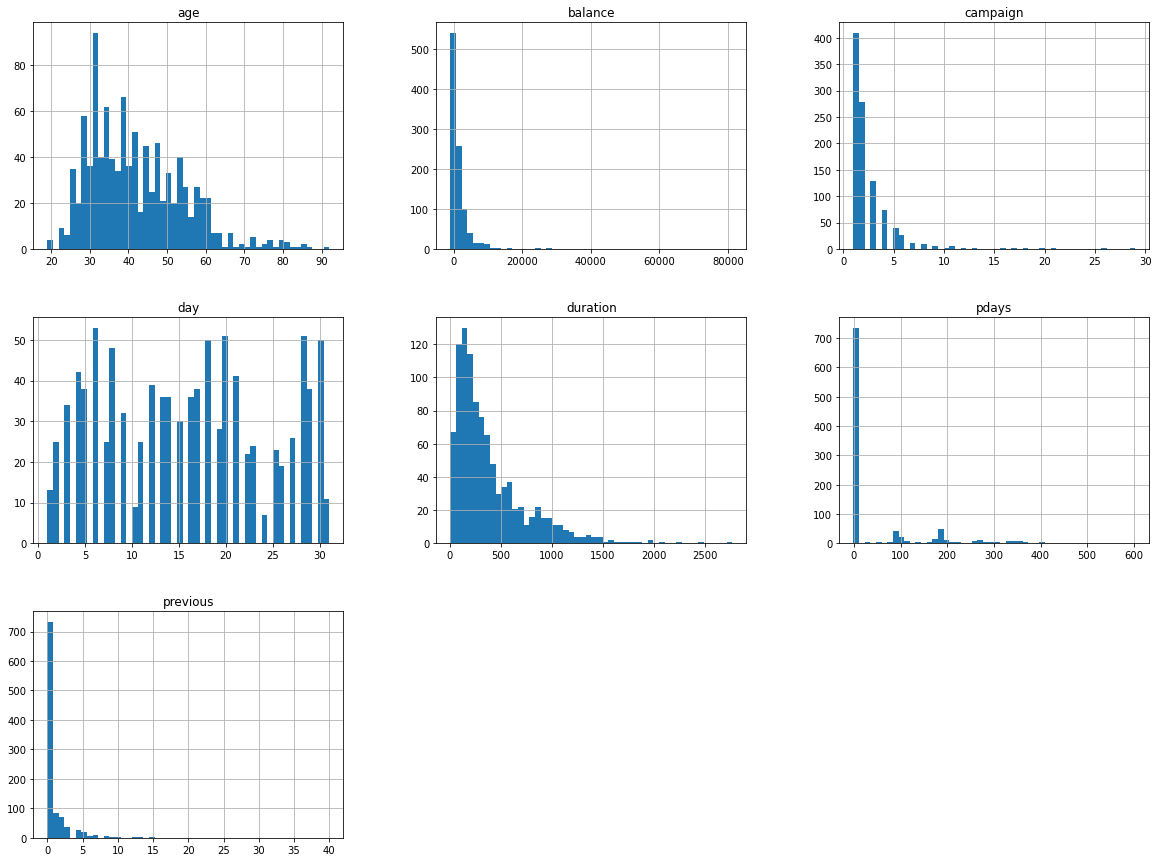

In [7]:
#Creating the histogram for exploration of the distributions
df.hist(bins=50, figsize=(20, 15))
plt.show()

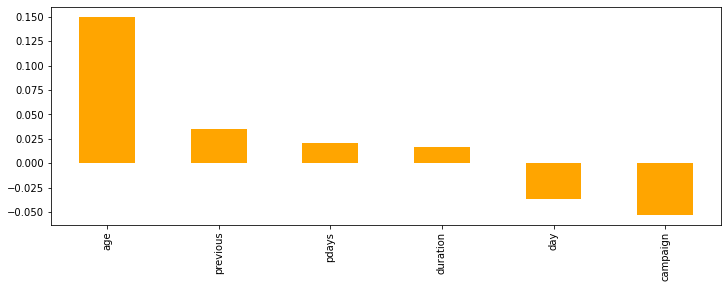

In [8]:
#Analyzing the Balance field with Age, Previous, duration, pdays,day and campaign to find the correlation between them
corr = df.corr()
corr['balance'].sort_values(ascending=False).iloc[1:].plot(kind='bar', figsize=(12, 4), color='orange')
plt.show()

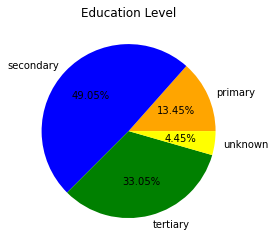

In [9]:
# Education distribution

size = [1501, 5476, 3689, 497]
colors = ['Orange', 'Blue', 'Green', 'Yellow']
labels = "primary", "secondary", "tertiary", "unknown"
explode = [0, 0, 0, 0]
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.title('Education Level')
plt.show()

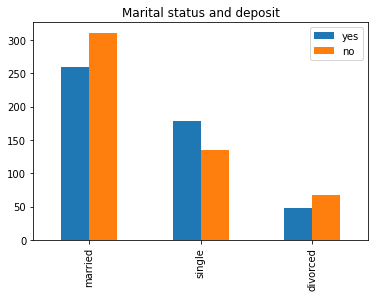

In [10]:
#marital status and deposit
%matplotlib inline
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')
plt.show()

# Preprocessing

### 1) Taking care of missing data

In [11]:
df.isnull().sum() #checking for missing data in our dataset

age            0
job            5
marital        0
education     65
default        0
balance        0
housing        0
loan           0
contact      218
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome     732
deposit        0
dtype: int64

In [12]:
#Finding the percentage of missing data in Job
print("Job data missing:",df["job"].isnull().sum())
print("Percentage missing:",str(round(df["job"].isnull().sum()/len(df)*100)) + "%")

Job data missing: 5
Percentage missing: 0.0%


In [13]:
#Finding the percentage of missing data in Education
print("Education data missing:",df["education"].isnull().sum())
print("Percentage missing:",str(round(df["education"].isnull().sum()/len(df)*100)) + "%")

Education data missing: 65
Percentage missing: 6.0%


In [14]:
#Finding the percentage of missing data in Contact
print("Contact data missing:",df["contact"].isnull().sum())
print("Percentage missing:",str(round(df["contact"].isnull().sum()/len(df)*100)) + "%")

Contact data missing: 218
Percentage missing: 22.0%


In [15]:
#Finding the percentage of missing data in Poutcome
print("poutcome data missing:",df["poutcome"].isnull().sum())
print("Percentage missing:",str(round(df["poutcome"].isnull().sum()/len(df)*100)) + "%")

poutcome data missing: 732
Percentage missing: 73.0%


Since 75% of data is missing in poutcome column, we are dropping it

In [16]:
df.drop(("poutcome"), axis = 1, inplace = True)

In [17]:
#Since all the columns with missing values are categorical, we are using most frequent (mode) method to impute missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  
df['job'] = imputer.fit_transform(df[["job"]])
df['education'] = imputer.fit_transform(df[["education"]])
df['contact'] = imputer.fit_transform(df[["contact"]])

In [18]:
df.isnull().sum() #No missing values in our dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

### 2) Encoding categorical data

In [19]:
#Binary variables are encoded as 0 and 1
df['default'] = df['default'].map( {'yes': 1, 'no': 0} ).astype(int)
df['housing'] = df['housing'].map( {'yes': 1, 'no': 0} ).astype(int)
df['loan'] = df['loan'].map( {'yes': 1, 'no': 0} ).astype(int)
df['contact'] = df['contact'].map( {'cellular': 1, 'telephone': 0} ).astype(int)
df['deposit'] = df['deposit'].map( {'yes': 1, 'no': 0} ).astype(int)

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
#Education is an ordinal categorical variable
df[['education']] = enc.fit_transform(df[['education']])

In [21]:
X = df.iloc[:,:-1].values #splitting dataset into X and y numpy arrays
y = df.iloc[:,-1].values

In [22]:
X[0]

array([31, 'admin.', 'single', 1.0, 0, 554, 1, 0, 1, 5, 'feb', 94, 1, -1,
       0], dtype=object)

In [23]:
y

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [24]:
#OneHot Encoding categorical variables with more than 2 classes
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [25]:
X[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       31, 1.0, 0, 554, 1, 0, 1, 5, 94, 1, -1, 0], dtype=object)

In [26]:
X.shape

(1000, 38)

In [27]:
y.shape

(1000,)

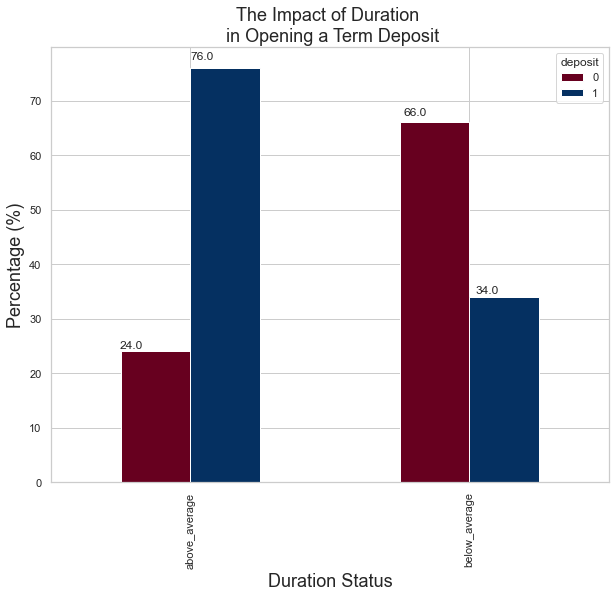

In [28]:
#Plotting the graph for The Impact of Duration in Opening a Term Deposit
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

# Splitting dataset into train and test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
#Splitting dataset into 80:20 train:test

In [30]:
X_train.shape

(800, 38)

In [31]:
X_test.shape

(200, 38)

# Feature Scaling 

We used Standard Scaler to normalize the dataset as our dataset has less of outliers and in order to make the mean = 0 and std dev =1

In [32]:
#This is important so that one variable doesn't dominate the model
from sklearn.preprocessing import StandardScaler #This makes our dataset mean = 0 and std dev = 1
sc = StandardScaler()
X_train[:, [26,29,33,34,35,36,37]] = sc.fit_transform(X_train[:, [26,29,33,34,35,36,37]])
X_test[:,[26,29,33,34,35,36,37]] = sc.transform(X_test[:, [26,29,33,34,35,36,37]]) #Using the same values of X_train to transform both X_test and test

In [33]:
X_train[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       -0.6549973924936232, 1.0, 0, -0.39442630245545657, 1, 0, 1,
       1.2840936024590632, -0.6209843165349419, -0.19343413663666292,
       -0.5093563942238205, -0.376393683843489], dtype=object)

In [34]:
X_test[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.1489269922791576, 0.0, 0, -0.34499049750176575, 0, 0, 1,
       1.512174171279501, -0.2678045659729869, -0.6028185527989124,
       -0.5093563942238205, -0.376393683843489], dtype=object)

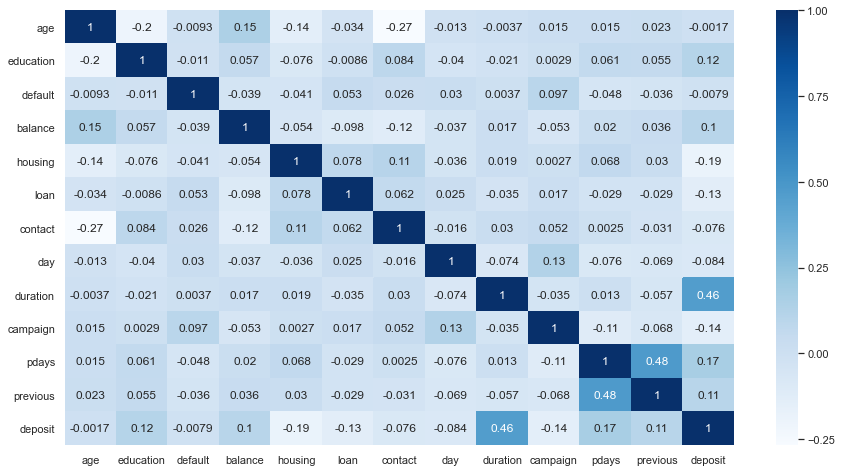

In [35]:
cor = df.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

Duration, pdays and previous have a high impact on deposit. There is so a significant correlation between pdays and previous.

# We are going to try different classification models on our dataset

# 1) Logistic Regression

Building a model with default parameters

In [36]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#Using gridsearch to find the best hyperparameter values for the model
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty': ['l1', 'l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'C': 1, 'penalty': 'l2'}


In [38]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0, C = 1, penalty = "l2")
classifier1.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred_new = classifier1.predict(X_test)

In [40]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_new)
print("Confusion Matrix:\n",cm)
print("Training accuracy: {:.2f}".format((classifier1.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((accuracy_score(y_test, y_pred_new))*100) + "%" )

Confusion Matrix:
 [[93 16]
 [26 65]]
Training accuracy: 83.12%
Testing accuracy: 79.00%


In [41]:
#cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.11 %
Standard Deviation: 3.29 %


# 2) K Nearest Neighbour

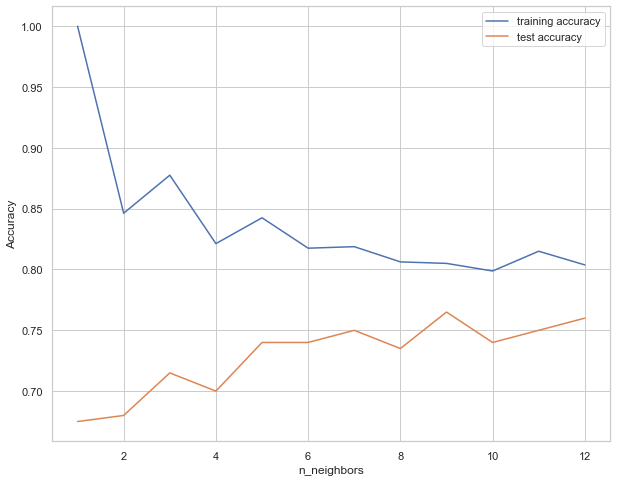

In [42]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 12
neighbors_settings = range(1, 13)
for n_neighbors in neighbors_settings:
    # build the model
    classifier2 = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier2.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(classifier2.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(classifier2.score(X_test, y_test))
#plotting train and test scores for n_neighbors from 1 to 12
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [43]:
#Using gridsearch to find the best hyperparameter values for the model
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}]
grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 77.12 %
Best Parameters: {'n_neighbors': 5}


C:\Users\14699\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
classifier2 = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [48]:
y_pred = classifier2.predict(X_test) #Predicting values for the X_test dataset

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Training accuracy: {:.2f}".format((classifier2.score(X_train,y_train))*100) + "%" ) #train score
print("Testing accuracy: {:.2f}".format((accuracy_score(y_test, y_pred))*100) + "%" ) #test score

[[92 17]
 [30 61]]
Training accuracy: 80.50%
Testing accuracy: 76.50%


In [50]:
#cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.11 %
Standard Deviation: 3.14 %


# 3) SVM

In [51]:
from sklearn.svm import LinearSVC
classifier3 = LinearSVC(random_state = 0)
classifier3.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [52]:
#Using gridsearch to find the best hyperparameter values for the model
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(estimator = classifier3,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.38 %
Best Parameters: {'C': 0.1}


C:\Users\14699\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [53]:
classifier3 = LinearSVC(C = 0.1)
classifier3.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [54]:
y_pred = classifier3.predict(X_test)

In [55]:
#crossvalidation error
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Training accuracy: {:.2f}".format((classifier3.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((accuracy_score(y_test, y_pred))*100) + "%" )

[[94 15]
 [29 62]]
Training accuracy: 83.25%
Testing accuracy: 78.00%


In [56]:
#cross-validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.35 %
Standard Deviation: 3.71 %


# 4a) Kernel SVM - rbf

In [57]:
from sklearn.svm import SVC
classifier4a = SVC(kernel = 'rbf', random_state = 0)
classifier4a.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
#Using gridsearch to find the best hyperparameter values for the model
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001,0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier4a,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'C': 1, 'gamma': 0.2}


C:\Users\14699\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [59]:
classifier4a = SVC(kernel = 'rbf',C = 1, gamma = 0.2,random_state = 0, probability=True)
classifier4a.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [60]:
y_pred = classifier4a.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Training accuracy: {:.2f}".format((classifier4a.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((accuracy_score(y_test, y_pred))*100) + "%" )

[[88 21]
 [17 74]]
Training accuracy: 92.88%
Testing accuracy: 81.00%


In [62]:
#cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier4a, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.50 %
Standard Deviation: 2.10 %


# 4b) Kernel SVM - poly

In [63]:
from sklearn.svm import SVC
classifier4b = SVC(kernel = 'poly', random_state = 0)
classifier4b.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [64]:
#Using gridsearch to find the best hyperparameter values for the model
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [2,3,4,5,6,7,8,9,10] }]
grid_search = GridSearchCV(estimator = classifier4b,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'C': 100, 'degree': 3}


C:\Users\14699\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [65]:
classifier4b = SVC(kernel = 'poly',C = 100 ,degree = 3,random_state = 0, probability=True)
classifier4b.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
y_pred = classifier4b.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Training accuracy: {:.2f}".format((classifier4b.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((accuracy_score(y_test, y_pred))*100) + "%" )

[[93 16]
 [25 66]]
Training accuracy: 93.88%
Testing accuracy: 79.50%


In [68]:
#cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier4b, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.74 %
Standard Deviation: 2.86 %


# 4c) Kernel SVM - Linear

In [69]:
from sklearn.svm import SVC
classifier4c = SVC(kernel = "linear", random_state = 0)
classifier4c.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
#Using gridsearch to find the best hyperparameter values for the model
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(estimator = classifier4c,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.25 %
Best Parameters: {'C': 0.1}


C:\Users\14699\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [71]:
classifier4c = SVC(kernel = "linear", C = 0.1, probability=True)
classifier4c.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [72]:
y_pred = classifier4c.predict(X_test)

In [73]:
#crossvalidation error
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Training accuracy: {:.2f}".format((classifier4c.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((accuracy_score(y_test, y_pred))*100) + "%" )

[[92 17]
 [26 65]]
Training accuracy: 82.00%
Testing accuracy: 78.50%


# 5) Decision tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Using gridsearch to find the best hyperparameter values for the model
param_grid = {'max_depth': np.arange(3, 10)}

classifier5 = GridSearchCV(DecisionTreeClassifier(), param_grid)

classifier5.fit(X_train, y_train)
tree_preds = classifier5.predict_proba(X_test)

classifier5.best_params_

{'max_depth': 3}

In [75]:
#We got the best number of depths as 3
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state = 0)
classifier5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [76]:
y_pred = classifier5.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Training accuracy: {:.2f}".format((classifier5.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((accuracy_score(y_test, y_pred))*100) + "%" )

[[101   8]
 [ 42  49]]
Training accuracy: 75.38%
Testing accuracy: 75.00%


In [78]:
#cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier5, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.51 %
Standard Deviation: 1.47 %


# Results

### We tried 5 different classification models on our dataset. These are the results:
#### 1) Logistic Regression : 
         Training accuracy: 83.12%
         Testing accuracy: 79.00%
#### 2) K Nearest neighbor Classification: 
         Training accuracy: 80.56%
         Testing accuracy: 76.50%
#### 3) Support Vector Machine Classification : 
         Training accuracy: 83.25%
         Testing accuracy: 78.00%
#### 4a) Kernel SVM - rbf  : 
         Training accuracy: 92.88%
         Testing accuracy: 81.00%
#### 4b) Kernel SVM - poly :
         Training accuracy: 93.88%
         Testing accuracy: 79.50%
#### 4c) Kernel SVM - linear :
         Training accuracy: 82.00%
         Testing accuracy: 78.50%
#### 5)  Decison Tree Classification : 
         Training accuracy: 75.38%
         Testing accuracy: 75.00%

# Conclusion

### From the confusion matrix , True positive and True Negative are important features in Classifcation models and hence choosing the accuracy is the best as it predicts the model accurately. From the results we can see Logistic Regression yields the highest accuracy (79.00%) for this dataset and it is not overfitting. We will use that model to classify our test set.

In [79]:
final_test_pred = classifier1.predict(X_test)

# Project 2

# 1) Voting Classifier

# 1a) Hard voting

In [80]:
from sklearn.ensemble import VotingClassifier
hard_voting = VotingClassifier(estimators=[('lr', classifier1), ('knn', classifier2), ('svm', classifier3), 
                                           ('rbf', classifier4a), ('poly', classifier4b), ('linear', classifier4c), 
                                           ('dt', classifier5)], voting = 'hard')

In [81]:
print('Logistic regression: ', classifier1.score(X_train, y_train))
print('KNN: ', classifier2.score(X_train, y_train))
print('SVM: ', classifier3.score(X_train, y_train))
print('Kernel - rbf: ', classifier4a.score(X_train, y_train))
print('Kernel - poly: ', classifier4b.score(X_train, y_train))
print('Kernel - linear: ', classifier4c.score(X_train, y_train))
print('Decision Trees: ', classifier5.score(X_train, y_train))

Logistic regression:  0.83125
KNN:  0.805
SVM:  0.8325
Kernel - rbf:  0.92875
Kernel - poly:  0.93875
Kernel - linear:  0.82
Decision Trees:  0.75375


In [82]:
hard_voting.fit(X_train, y_train)
print('voting classifier train score: {:.2f} % '.format((hard_voting.score(X_train, y_train))*100))
print('voting classifier test score: {:.2f} % '.format((hard_voting.score(X_test, y_test))*100))

voting classifier train score: 86.50 % 
voting classifier test score: 80.00 % 


# 1b) Soft voting

In [83]:
from sklearn.ensemble import VotingClassifier
soft_voting = VotingClassifier(estimators=[('lr', classifier1), ('knn', classifier2),  
                                           ('rbf', classifier4a), ('poly', classifier4b), ('linear', classifier4c), 
                                           ('dt', classifier5)], voting = 'soft')

In [84]:
print('Logistic regression: ', classifier1.score(X_train, y_train))
print('KNN: ', classifier2.score(X_train, y_train))
#print('SVM: ', classifier3.score(X_train, y_train))
print('Kernel - rbf: ', classifier4a.score(X_train, y_train))
print('Kernel - poly: ', classifier4b.score(X_train, y_train))
print('Kernel - linear: ', classifier4c.score(X_train, y_train))
print('Decision Trees: ', classifier5.score(X_train, y_train))

Logistic regression:  0.83125
KNN:  0.805
Kernel - rbf:  0.92875
Kernel - poly:  0.93875
Kernel - linear:  0.82
Decision Trees:  0.75375


In [85]:
soft_voting.fit(X_train, y_train)
print('voting classifier train score:  {:.2f} %'.format((soft_voting.score(X_train, y_train))*100))
print('voting classifier test score: {:.2f} %'.format((soft_voting.score(X_test, y_test))*100))

voting classifier train score:  89.50 %
voting classifier test score: 81.50 %


In [86]:
voting_classifier_comparision=pd.DataFrame(columns=['Hard Voting',' Soft Voting'],
                                   index=['Train','Test'])

In [87]:
voting_classifier_comparision.loc['Train'] = [hard_voting.score(X_train, y_train),soft_voting.score(X_train, y_train)]
voting_classifier_comparision.loc['Test'] = [hard_voting.score(X_test, y_test),soft_voting.score(X_test, y_test)]
voting_classifier_comparision

,Hard Voting,Soft Voting
Train,0.865,0.895
Test,0.8,0.815


### From the above comparison, we observe that soft voting is better than hard voting.

# 2a) Bagging

The two models being used are SVM and Decision Tree

1) SVM

In [92]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = {'n_estimators': np.arange(10,300,50),
              'max_samples': [50,100,200,400]}

grid_search = GridSearchCV(BaggingClassifier(classifier3,random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 50, 'n_estimators': 10}
Best cross-validation score: 0.81


In [93]:
from sklearn.ensemble import BaggingClassifier
bag_clf1 = BaggingClassifier(classifier3, n_estimators=10, max_samples =  50,bootstrap= True, random_state = 0)
bag_clf1.fit(X_train, y_train)

BaggingClassifier(base_estimator=LinearSVC(C=0.1, class_weight=None, dual=True,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           loss='squared_hinge', max_iter=1000,
                                           multi_class='ovr', penalty='l2',
                                           random_state=None, tol=0.0001,
                                           verbose=0),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=50, n_estimators=10, n_jobs=None, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

In [94]:
print("Training accuracy: {:.2f}".format((bag_clf1.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((bag_clf1.score(X_test, y_test))*100) + "%" )

Training accuracy: 83.25%
Testing accuracy: 78.00%


2) Decision Tree

In [91]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = {'n_estimators': np.arange(10,300,30),
              'max_samples': [50,100,200,400]}

grid_search = GridSearchCV(BaggingClassifier(classifier5,random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 200, 'n_estimators': 100}
Best cross-validation score: 0.80


In [95]:
bag_clf2 = BaggingClassifier(classifier5, n_estimators= 100, max_samples =  200, bootstrap= True, random_state = 0)
bag_clf2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

In [96]:
print("Training accuracy: {:.2f}".format((bag_clf2.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((bag_clf2.score(X_test, y_test))*100) + "%" )

Training accuracy: 81.50%
Testing accuracy: 77.00%


Bagging has improved the accuracy for both decision tree and SVM

# 2b) Pasting

The two models being used are SVM kernel - linear and Decision trees

1) SVM kernel - linear

In [97]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400]}

grid_search = GridSearchCV(BaggingClassifier(classifier4c,random_state = 0,bootstrap= False),
                           param_grid, cv=5, return_train_score=True, n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 400, 'n_estimators': 500}
Best cross-validation score: 0.81


In [98]:
from sklearn.ensemble import BaggingClassifier
paste_clf1 = BaggingClassifier(classifier4c, n_estimators=500, max_samples =  400,bootstrap= False, random_state = 0)
paste_clf1.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=0.1, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto_deprecated',
                                     kernel='linear', max_iter=-1,
                                     probability=True, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=400, n_estimators=500, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
print("Training accuracy: {:.2f}".format((paste_clf1.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((paste_clf1.score(X_test, y_test))*100) + "%" )

Training accuracy: 82.25%
Testing accuracy: 78.50%


2) Decision Tree

In [100]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400]}

grid_search = GridSearchCV(BaggingClassifier(classifier5,random_state = 0,bootstrap= False),
                           param_grid, cv=5, return_train_score=True, n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 50, 'n_estimators': 50}
Best cross-validation score: 0.79


In [101]:
paste_clf2 = BaggingClassifier(classifier5, n_estimators=50, max_samples =  50, bootstrap= False, random_state = 0)
paste_clf2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

In [102]:
print("Training accuracy: {:.2f}".format((paste_clf2.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((paste_clf2.score(X_test, y_test))*100) + "%" )

Training accuracy: 79.75%
Testing accuracy: 77.50%


Pasting has improved the accuracy of both SVM and decision trees

# Random Forest

In [103]:
#Using Gridsearch to find the best paramter
from sklearn.ensemble import RandomForestClassifier

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestClassifier(random_state = 0), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

gridF.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.7min finished


{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1200}

In [105]:
rnd_clf = RandomForestClassifier(n_estimators=1200, min_samples_split=5, min_samples_leaf =1 ,max_depth = 15,
                                 n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

y_pred_train = rnd_clf.predict(X_train)
y_pred_test = rnd_clf.predict(X_test)

In [106]:
print("Training accuracy: {:.2f}".format((rnd_clf.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((rnd_clf.score(X_test, y_test))*100) + "%" )

Training accuracy: 98.50%
Testing accuracy: 82.00%


# 3a) Adaboosting

The two models being used are Logistic regression and Decision Trees

1) Logistic Regression

In [108]:
# Grid search to find the best parameter for Adaboosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

params = {
     'n_estimators': np.arange(10,500,50),
     'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 1],
 }
grid_cv = GridSearchCV(AdaBoostClassifier(classifier1), param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

{'learning_rate': 1, 'n_estimators': 460}

In [109]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf1 = AdaBoostClassifier(classifier1, n_estimators= 460, learning_rate= 1,random_state = 0)
ada_clf1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=0,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1, n_estimators=460, random_state=0)

In [110]:
print("Training accuracy: {:.2f}".format((ada_clf1.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((ada_clf1.score(X_test, y_test))*100) + "%" )

Training accuracy: 81.12%
Testing accuracy: 78.50%


2) Decision Trees

In [111]:
# Grid search to find the best parameter for Adaboosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

params = {
     'n_estimators': np.arange(10,500,50),
     'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 1],
 }
grid_cv = GridSearchCV(AdaBoostClassifier(classifier5), param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

{'learning_rate': 1, 'n_estimators': 410}

In [112]:
ada_clf2= AdaBoostClassifier(classifier5,n_estimators= 410, learning_rate= 1,random_state=0)
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=0,
                             

In [113]:
print("Training accuracy: {:.2f}".format((ada_clf2.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((ada_clf2.score(X_test, y_test))*100) + "%" )

Training accuracy: 100.00%
Testing accuracy: 79.00%


# 3b) Gradient Boosting 

In [114]:
# Grid search to find the best parameter for Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
params = {
     'n_estimators': np.arange(10,300,30),
     'learning_rate': [0.01, 0.05, 0.1, 1],
    'max_depth' : [1,2,3,4]
 }
grid_cv = GridSearchCV(GradientBoostingClassifier(), param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 280}

In [115]:
clf = GradientBoostingClassifier(max_depth= 3, n_estimators= 280, learning_rate= 0.1, random_state= 0)
clf.fit(X_train, y_train)

#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[101,   8],
       [ 42,  49]], dtype=int64)

In [116]:
print("Training accuracy: {:.2f}".format((clf.score(X_train,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((clf.score(X_test, y_test))*100) + "%" )

Training accuracy: 98.62%
Testing accuracy: 81.50%


# 4) PCA

In [127]:
from sklearn.decomposition import PCA

pca_classification = PCA(n_components = .95)
X_train_class = pca_classification.fit_transform(X_train)
X_test_class = pca_classification.transform(X_test)

In [128]:
# number of components after PCA
pca_classification.n_components_

21

# 1) KNN Classifier after PCA

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1,10)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Grid Search Score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 7}
Best Grid Search Score: 0.77


C:\Users\14699\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [130]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_class, y_train)
y_pred_knn = knn.predict(X_test_class)
knn_train_Score = round(knn.score(X_train_class,y_train),4)
knn_test_Score = round(knn.score(X_test_class,y_test),4)
print('Train score on best parameters',knn_train_Score)
print('Test score on best parameters',knn_test_Score)

Train score on best parameters 0.83
Test score on best parameters 0.75


# 2) Logistic Regression after PCA

In [131]:
from sklearn.linear_model import LogisticRegression
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid_svm, cv=5, return_train_score=True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best grid search score: {:.6f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best grid search score: 0.790000


In [132]:
log_reg = LogisticRegression(C=0.1,penalty='l2').fit(X_train_class, y_train)
log_reg_train_Score = round(log_reg.score(X_train_class,y_train),4)
log_reg_test_Score = round(log_reg.score(X_test_class,y_test),4)
y_pred = log_reg.predict(X_test_class)
print('Train score on best parameters for Logistic Regression model',log_reg_train_Score)
print('Test score on best parameters for Logistic Regression model',log_reg_test_Score)

Train score on best parameters for Logistic Regression model 0.7988
Test score on best parameters for Logistic Regression model 0.77


# 3) Linear SVM after PCA

In [133]:
from sklearn.svm import SVC
LinearSVC = SVC(kernel='linear')
param_grid = { 'max_iter' : range(1,200),'C' : [ 0.01, 0.1, 1, 10, 100, 1000]}

svc_grid_search_linear = GridSearchCV(LinearSVC, param_grid, cv=10, return_train_score=True)
svc_grid_search_linear.fit(X_train_class, y_train)

print("Best parameters: {}".format(svc_grid_search_linear.best_params_))
print("Best grid search score: {:.2f}".format(svc_grid_search_linear.best_score_))

Best parameters: {'C': 0.1, 'max_iter': 197}
Best grid search score: 0.74


C:\Users\14699\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [134]:
from sklearn.svm import SVC, LinearSVC
lsvc = LinearSVC (C = 0.1 ,max_iter = 197).fit(X_train_class, y_train)
# Linear SVM
linear_svm_train =round(lsvc.score(X_train_class,y_train),4)
linear_svm_test =round(lsvc.score(X_test_class,y_test),4)
print('Train score with best parameters for Linear SVM - {}'.format(linear_svm_train))
print('Test score with best parameters for Linear SVM - {}'.format(linear_svm_test))

Train score with best parameters for Linear SVM - 0.7988
Test score with best parameters for Linear SVM - 0.755


# 4a) Kernel SVM - rbf

In [141]:
from sklearn.svm import SVC 
KernelSVC1 = SVC(kernel = "rbf", max_iter=10000)
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[1,0.1,0.001]}
                 
# Uisng Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC1, kernelSVC_params,cv=10)
KernelSVC_clf.fit(X_train_class,y_train)
KernelSVC_clf.best_params_

{'C': 1, 'gamma': 0.1}

In [142]:
kernel_clf= SVC(kernel='rbf', C= 1, gamma= 0.1)
kernel_clf.fit(X_train_class,y_train)
kernel_clf.score(X_train_class,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train_class, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test_class, y_test)))

Accuracy of Kernelized SVM on training set: 0.8712
Accuracy of Kernelized SVM on test set: 0.7950


# 4b) Kernel SVM - Linear after PCA

In [143]:
from sklearn.svm import SVC 
KernelSVC2 = SVC(kernel = "linear", max_iter=10000)
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10]}

In [144]:
# Uisng Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC2, kernelSVC_params,cv=10)
KernelSVC_clf.fit(X_train_class,y_train)
KernelSVC_clf.best_params_

C:\Users\14699\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1}

In [145]:
kernel_clf= SVC(kernel='linear', C= 1)
kernel_clf.fit(X_train_class,y_train)
kernel_clf.score(X_train_class,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train_class, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test_class, y_test)))

Accuracy of Kernelized SVM on training set: 0.8037
Accuracy of Kernelized SVM on test set: 0.7800


# 4c) Kernel SVM (Poly) after PCA

In [138]:
from sklearn.svm import SVC 
KernelSVC = SVC(kernel = "poly", max_iter=10000)
kernelSVC_params = {'C':[0.01, 0.1, 1, 10], 'degree': [2,3,4,5,6,7,8,9,10] }

# Uisng Grid search to find the best parameters and fitting the model
from sklearn.model_selection import GridSearchCV
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train_class,y_train)
KernelSVC_clf.best_params_

{'C': 0.01, 'gamma': 1}

In [139]:
kernel_clf= SVC(kernel='poly', C= 0.01, gamma= 1)
kernel_clf.fit(X_train_class,y_train)
kernel_clf.score(X_train_class,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train_class, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test_class, y_test)))

Accuracy of Kernelized SVM on training set: 0.9475
Accuracy of Kernelized SVM on test set: 0.7550


# 5) Decision Tree after PCA

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Using gridsearch to find the best hyperparameter values for the model
param_grid = {'max_depth': np.arange(3, 10)}

classifier5 = GridSearchCV(DecisionTreeClassifier(), param_grid)

classifier5.fit(X_train_class, y_train)
tree_preds = classifier5.predict_proba(X_test_class)

classifier5.best_params_

{'max_depth': 5}

In [136]:
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state = 0)
classifier5.fit(X_train_class, y_train)

y_pred = classifier5.predict(X_test_class)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Training accuracy: {:.2f}".format((classifier5.score(X_train_class,y_train))*100) + "%" )
print("Testing accuracy: {:.2f}".format((accuracy_score(y_test, y_pred))*100) + "%" )

[[86 23]
 [39 52]]
Training accuracy: 82.62%
Testing accuracy: 69.00%


### We tried 5 different classification models on our dataset. These are the results:
                                             Before PCA    &     After PCA Scores
      
#### 1) Logistic Regression :                                                                                          
         Training accuracy:                     83.12%             79.88%
         Testing accuracy:                      79.00%             77.00%
#### 2) K Nearest neighbor Classification: 
         Training accuracy:                     80.56%             83.00%
         Testing accuracy:                      76.50%             75.00%
#### 3) Support Vector Machine Classification : 
         Training accuracy:                     83.25%             79.88%
         Testing accuracy:                      78.00%             75.5%
#### 4a) Kernel SVM - rbf  : 
         Training accuracy:                     92.88%             87.12%
         Testing accuracy:                      81.00%             79.50%
#### 4b) Kernel SVM - poly :
         Training accuracy:                     93.88%             80.37%
         Testing accuracy:                      79.50%             78.00%
#### 4c) Kernel SVM - linear :
         Training accuracy:                     82.00%             94.75%
         Testing accuracy:                      78.50%             75.5%
#### 5)  Decison Tree Classification : 
         Training accuracy:                     75.38%             82.62%
         Testing accuracy:                      75.00%             69.00%

### From the above table we see that PCA has not improved much on the models because all the features are essential for this model and from the results we can see Logistic Regression before PCA yields the highest accuracy (79.00%) for this dataset and it is not overfitting. We will use that model to classify our test set.

# 5) Deep learning

In [117]:
from keras.models import Sequential
from keras.layers import Dense

# fix random seed for reproducibility
np.random.seed(10)

In [118]:
# create model
def create_model():

    model = Sequential()
    model.add(Dense(38, input_dim=38, activation='relu')) #input layer
    model.add(Dense(20, activation='relu')) #hidden layer
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid')) #output layer
   
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [120]:
# Compile model
from sklearn.model_selection import GridSearchCV
#model = create_model()

In [121]:
from keras import backend as K
X_train1 = K.cast_to_floatx(X_train)
y_train1 = K.cast_to_floatx(y_train)

In [122]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100, 150]}
grid_cv = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)
grid_cv.fit(X_train1,y_train1)
grid_cv.best_params_

{'batch_size': 10, 'epochs': 10}

In [123]:
# Fit the model
model = create_model()
model.fit(X_train1, y_train1, epochs=10, batch_size=10)

Epoch 1/10
80/80 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5888
Epoch 2/10
80/80 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7538
Epoch 3/10
80/80 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7937
Epoch 4/10
80/80 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8225
Epoch 5/10
80/80 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8388
Epoch 6/10
80/80 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8438
Epoch 7/10
80/80 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8500
Epoch 8/10
80/80 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8612
Epoch 9/10
80/80 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8600
Epoch 10/10
80/80 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8675


In [124]:
from keras import backend as K
X_test1 = K.cast_to_floatx(X_test)
y_test1 = K.cast_to_floatx(y_test)

In [125]:
# evaluate the model
scores = model.evaluate(X_test1, y_test1)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7/7 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7900

accuracy: 79.00%


In [126]:
y_predict = model.predict(X_test1)
y_predict

array([[0.18497261],
       [0.01248044],
       [0.71585137],
       [0.55642074],
       [0.35578772],
       [0.01011914],
       [0.06638509],
       [0.05195972],
       [0.38620418],
       [0.10017124],
       [0.53414536],
       [0.46943846],
       [0.49361652],
       [0.83780575],
       [0.8350381 ],
       [0.96114624],
       [0.2930341 ],
       [0.5193196 ],
       [0.74322987],
       [0.01764283],
       [0.01226163],
       [0.10453221],
       [0.01323596],
       [0.30862612],
       [0.12085062],
       [0.03098944],
       [0.04190913],
       [0.11237368],
       [0.64019096],
       [0.01923165],
       [0.08063734],
       [0.07415107],
       [0.01129413],
       [0.79089165],
       [0.6914636 ],
       [0.9305537 ],
       [0.00645804],
       [0.16823289],
       [0.92666435],
       [0.9363047 ],
       [0.8949908 ],
       [0.7805373 ],
       [0.9213549 ],
       [0.244014  ],
       [0.19136691],
       [0.00361109],
       [0.6290715 ],
       [0.100